In [3]:
import numpy as np
import numpy.random as rng
import scipy.stats as stats

class RandomWalk:
    def __init__(self):
        self.growth = 0.0

    def get_data(self):
        x = rng.rand(140) - 0.5 + self.growth

        return x

In [88]:
class TrendFollower:
    def __init__(self, size):
        self.trend = np.zeros(size)
        self.momentum = np.full(size, 0.8)

    def follow(self, x):
        for i, security in np.ndenumerate(x):
            index = i[0]
            self.trend[index] = self.momentum[index] * self.trend[index] + (1 - self.momentum[index]) * security

        return self.trend

In [130]:
class StdDecisionMaker:
    def __init__(self, window_size, num_sec):
        self.window_size = window_size
        self.num_sec = num_sec
        self.data = []
        self.std = 0

    def get_size(self):
        return min(len(self.data), self.window_size)


    def decide(self, x):
        self.data.append(x)
        
        f = self.fit_line()
        std = self.get_std(f)
        diff = np.asarray([f[i](self.get_size()) for i in range(self.num_sec)]) - x
        q = diff - std
        
        return q.clip(min=0)

        
    def fit_line(self):
        size = self.get_size()
        x = np.vstack([np.linspace(1, size, num=size) for i in range(self.num_sec)]).T
        y = np.stack(self.data[-size:])
        funcs = []

        for i in range(self.num_sec):
            result = stats.linregress(x[:, i], y[:, i])
            func = lambda x: result.slope*x + result.intercept
            funcs.append(func)

        return funcs

    def get_std(self, funcs):
        diffs = []
        stds = []

        size = self.get_size()
        for i in range(self.num_sec):
            for j in range(size):
                expected_value = funcs[i](j)
                real_value = self.data[j][i]
                diff = expected_value - real_value
                diffs.append(diff)

            std = np.std(diffs)
            stds.append(std)

        return np.asarray(stds)

In [139]:
randomWallStreet = RandomWalk()
trendFollower = TrendFollower(140)
stdMaker = StdDecisionMaker(20, 140)

data = np.zeros(140)

for i in range(50):
    x = randomWallStreet.get_data()
    trend = trendFollower.follow(x)
    std = stdMaker.decide(x)

    datapoint = np.add(np.add(x, trend), std)
    data = np.append(data, datapoint, axis=0)

In [140]:
data = np.reshape(data, (140, -1))
cumulative = np.cumsum(data, axis=1)

In [141]:
cumulative[-1]

array([0.04748883, 0.51477368, 0.40334121, 0.86212987, 0.66584388,
       0.94373921, 1.37551077, 1.25179097, 1.03651906, 0.77441044,
       1.06907914, 0.97884533, 0.83411888, 0.72942385, 0.66057777,
       0.44929972, 0.31893271, 0.16886034, 0.0404496 , 0.41913566,
       0.37467316, 0.474429  , 0.68549267, 0.59533533, 0.44243751,
       0.67404243, 0.3964651 , 0.10857559, 0.48615576, 0.27962586,
       0.94213997, 1.4772078 , 1.35627171, 1.63938318, 1.64058826,
       1.93417359, 2.06816517, 2.3857963 , 2.19938948, 2.00926613,
       1.89832566, 1.64492746, 1.46186621, 1.29933401, 1.1312804 ,
       1.10866697, 1.40972152, 1.92771656, 2.26958378, 2.84030593,
       2.83597195])

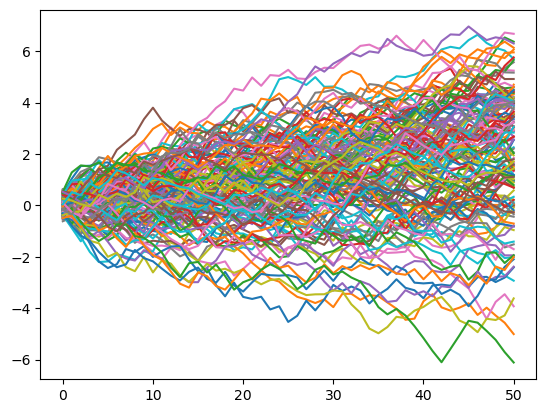

In [142]:
import matplotlib.pyplot as plt

plt.plot(cumulative.T)